In [5]:
import pandas as pd
from FixturesOdds import FixturesOdds
import numpy as np
import matplotlib.pyplot as plt

In [6]:
import FootballClf

In [7]:
%load_ext autoreload 
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
%matplotlib inline

In [9]:
def applic_odds(row):
    
    if row['prediction'] != row['HomeTeamResult']:
        return 0
    elif row['HomeTeamResult'] == 'W' :
        return row['HomeOdds']
    elif row['HomeTeamResult'] =='D':
        return row['DrawOdds']
    else:
        return row['AwayOdds']

def gen_report(fix):

    grouper = fix.df.groupby(fix.df.FixtureDateAsDate.dt.strftime('%Y-%W'))
    df = pd.DataFrame(grouper.applic_odds.sum())
    df['stake'] = grouper.stake.sum()
    df['weeklyprofit']=df.applic_odds + df.stake
    df['betting_account'] = df.weeklyprofit.cumsum()
    return df



In [10]:
disp_cols=['FixtureDateAsDate','HomeTeam', 'AwayTeam', 'prediction', 'HomeOdds', 
           'DrawOdds', 'AwayOdds', 'HomeTeamResult', 'stake', 'applic_odds', 'weeklyprofit']

In [11]:
fix_pred=FixturesOdds()
fix_pred.fix_load('vwCSV_3','vwCSV_3.csv', False) # no reresh
fix_pred.do_calcs()
fix_pred.clean_predict()

In [12]:
#which fixtures are we going to model?
fix_pred.filter_by_col('season',2018).filter_by_col('leagueid',1)

In [18]:
X=fix_pred.X()
c=FootballClf.FootballClf()
clf=c.load_by_name('betting clf')

In [16]:
c.load_by_name('betting clf_1.1')

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=60, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [19]:
fix_pred.df['prediction'] = clf.predict(X)

In [20]:

fix_pred.df['stake']=-1
fix_pred.df['applic_odds'] = fix_pred.df.apply(applic_odds, axis=1) #decide on payout
fix_pred.df['weeklyprofit']=fix_pred.df.applic_odds + fix_pred.df.stake

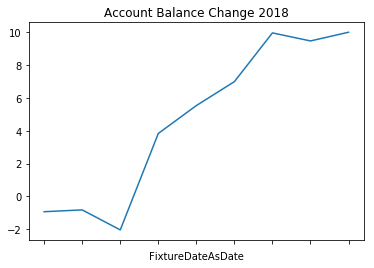

In [45]:
gen_report(fix_pred).betting_account.plot(title='Account Balance Change %s' % fix_pred.df.FixtureDateAsDate.dt.year.min())

In [25]:
df=gen_report(fix_pred)
df['pct_return']=-df.weeklyprofit/df.stake
df

,applic_odds,stake,weeklyprofit,betting_account,pct_return
FixtureDateAsDate,,,,,
2018-33,8.07,-9,-0.93,-0.93,-0.103333
2018-34,10.11,-10,0.11,-0.82,0.011000
2018-35,9.78,-11,-1.22,-2.04,-0.110909
2018-37,14.88,-9,5.88,3.84,0.653333
2018-38,12.70,-11,1.70,5.54,0.154545
2018-39,10.46,-9,1.46,7.00,0.162222
2018-40,13.97,-11,2.97,9.97,0.270000
2018-42,8.51,-9,-0.49,9.48,-0.054444
2018-43,1.53,-1,0.53,10.01,0.530000


In [26]:
df.pct_return.mean()

0.16804601571268238

In [28]:

def color_negative_red(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    color = 'red' if val < 0 else 'black'
    return 'color: %s' % color

In [40]:

s = df.style.applymap(color_negative_red)
df.style.format({"pct_return":"{:.0%}"})

,applic_odds,stake,weeklyprofit,betting_account,pct_return
FixtureDateAsDate,,,,,
2018-33,8.07,-9,-0.93,-0.93,-10%
2018-34,10.11,-10,0.11,-0.82,1%
2018-35,9.78,-11,-1.22,-2.04,-11%
2018-37,14.88,-9,5.88,3.84,65%
2018-38,12.7,-11,1.7,5.54,15%
2018-39,10.46,-9,1.46,7,16%
2018-40,13.97,-11,2.97,9.97,27%
2018-42,8.51,-9,-0.49,9.48,-5%
2018-43,1.53,-1,0.53,10.01,53%


In [44]:
df.weeklyprofit.mean()/(-1.0*df.stake.mean())

0.125125

In [381]:
fix_pred.df[disp_cols].tail(15)

,FixtureDateAsDate,HomeTeam,AwayTeam,prediction,HomeOdds,DrawOdds,AwayOdds,HomeTeamResult,stake,applic_odds,weeklyprofit
6240,2018-10-06,Leicester City,Everton,W,2.15,3.40,3.30,L,-1,0.00,-1.00
10247,2018-10-06,Manchester United,Newcastle United,W,1.44,4.20,7.50,W,-1,1.44,0.44
6354,2018-10-07,Liverpool,Manchester City,W,2.45,3.50,2.70,D,-1,0.00,-1.00
2096,2018-10-07,Fulham,Arsenal,L,4.75,4.20,1.61,L,-1,1.61,0.61
10479,2018-10-07,Southampton,Chelsea,L,5.50,3.90,1.60,L,-1,1.60,0.60
2341,2018-10-20,Wolverhampton Wanderers,Watford,W,1.72,3.50,5.00,L,-1,0.00,-1.00
6469,2018-10-20,Manchester City,Burnley,W,1.07,13.00,34.00,W,-1,1.07,0.07
6123,2018-10-20,Huddersfield Town,Liverpool,L,12.00,5.00,1.30,L,-1,1.30,0.30
10712,2018-10-20,West Ham United,Tottenham Hotspur,L,3.80,3.70,1.86,L,-1,1.86,0.86
10366,2018-10-20,Newcastle United,Brighton & Hove Albion,W,2.15,3.10,3.60,L,-1,0.00,-1.00


In [ ]:
#extra stuff

In [282]:
oddslist=['HomeOdds','DrawOdds', 'AwayOdds']
fix.df[oddslist].mean()

HomeOdds    2.470499
DrawOdds    3.528682
AwayOdds    3.713422
dtype: float64

In [114]:
size=400
df2=pd.DataFrame()
df2['fixdate']=pd.date_range(start='1/1/2018', periods=size)
df2['HomeOdds']=np.random.normal(1.8, 0.3,size=size)
df2['DrawOdds']=np.random.normal(3.1, 0.6,size=size)
df2['AwayOdds']=np.random.normal(2.2, 0.8,size=size)
df2['Result']=np.random.choice(['W','D','L'], size)
df2['prediction']=df2[oddslist].idxmin(axis=1).map({'HomeOdds':'W', 'DrawOdds':'D', 'AwayOdds':'L'})

df2['min_odds']=df2[oddslist].min(axis=1)
df2['stake']=-1
df2['payoff'] = np.where(df2['Result']==df2['prediction'],df2['min_odds'] , 0)
df2.head(10)

,fixdate,HomeOdds,DrawOdds,AwayOdds,Result,prediction,min_odds,stake,payoff
0,2018-01-01,1.538369,2.366103,2.297300,L,W,1.538369,-1,0.000000
1,2018-01-02,1.593540,4.062548,2.403764,L,W,1.593540,-1,0.000000
2,2018-01-03,1.989621,3.613715,2.228707,W,W,1.989621,-1,1.989621
3,2018-01-04,1.475949,2.623604,3.107861,L,W,1.475949,-1,0.000000
4,2018-01-05,1.786615,2.139673,2.420279,D,W,1.786615,-1,0.000000
5,2018-01-06,1.858807,3.493159,2.403025,D,W,1.858807,-1,0.000000
6,2018-01-07,1.616708,2.846147,4.231335,W,W,1.616708,-1,1.616708
7,2018-01-08,1.522520,2.848603,2.365399,W,W,1.522520,-1,1.522520
8,2018-01-09,1.735599,3.015244,1.713221,L,L,1.713221,-1,1.713221
9,2018-01-10,2.092888,3.722471,1.076603,L,L,1.076603,-1,1.076603


In [310]:
from sklearn.base import BaseEstimator, ClassifierMixin

class MeanClassifier(BaseEstimator, ClassifierMixin):  
    """An example of classifier"""

    def __init__(self, intValue=0, stringParam="defaultValue", otherParam=None):
        """
        Called when initializing the classifier
        """
        self.intValue = intValue
        self.stringParam = stringParam

        # THIS IS WRONG! Parameters should have same name as attributes
        self.differentParam = otherParam 


    def fit(self, X, y=None):
        """
        This should fit classifier. All the "work" should be done here.

        Note: assert is not a good choice here and you should rather
        use try/except blog with exceptions. This is just for short syntax.
        """

        assert (type(self.intValue) == int), "intValue parameter must be integer"
        assert (type(self.stringParam) == str), "stringValue parameter must be string"
        assert (len(X) == 20), "X must be list with numerical values."

        self.treshold_ = (sum(X)/len(X)) + self.intValue  # mean + intValue

        return self

    def _meaning(self, x):
        # returns True/False according to fitted classifier
        # notice underscore on the beginning
        return( True if x >= self.treshold_ else False )

    def predict(self, X, y=None):
        try:
            getattr(self, "treshold_")
        except AttributeError:
            raise RuntimeError("You must train classifer before predicting data!")

        return([self._meaning(x) for x in X])

    def score(self, X, y=None):
        # counts number of values bigger than mean
        return(sum(self.predict(X))) 

In [316]:
mc=MeanClassifier()
mc.fit(X_train,y=[1 for i in range(21)] )

MeanClassifier(intValue=0, otherParam=None, stringParam='defaultValue')

In [317]:
mc.predict([8])

[False]

In [311]:
from sklearn.grid_search import GridSearchCV

X_train = [i for i in range(0, 100, 5)]  
X_test = [i + 3 for i in range(-5, 95, 5)]  
tuned_params = {"intValue" : [-10,-1,0,1,10]}

gs = GridSearchCV(MeanClassifier(), tuned_params)

# for some reason I have to pass y with same shape
# otherwise gridsearch throws an error. Not sure why.
gs.fit(X_test, y=[1 for i in range(20)])

gs.best_params_ # {'intValue': -10} # and that is what we expect :)  

AssertionError: X must be list with numerical values.

In [397]:
fix_pred=FixturesOdds()
fix_pred.fix_load('vwCSV_3','vwCSV_3.csv', False) # no reresh
#fix_pred.do_calcs()
#fix_pred.clean_predict()

In [404]:
fix_pred.filter_by_col('HomeTeamID', 75).filter_by_col('season',2018).df[disp_cols]

KeyError: "['prediction' 'stake' 'applic_odds' 'weeklyprofit'] not in index"

In [406]:
fix_pred.df[fix_pred.df.FixtureID==9631]['HomeTeam']

6798    Brighton & Hove Albion
Name: HomeTeam, dtype: object

In [405]:
fix_pred.get_odds('ladbrokes',1)

,HomeTeam,HomeOdds,DrawOdds,AwayOdds
0,Southampton,2.00,3.25,4.00
1,Liverpool,1.11,10.00,23.00
2,Fulham,2.80,3.60,2.38
3,Brighton and Hove Albion,3.40,3.00,2.30
4,Watford,1.73,3.40,5.50
5,Leicester City,2.10,3.30,3.50
6,Crystal Palace,4.33,3.90,1.75
7,Burnley,9.50,4.75,1.36
8,Manchester United,1.73,3.70,4.60
9,Tottenham Hotspur,4.60,3.90,1.70
